In [34]:
%pylab inline

import mdtraj
import thor
from thor import scatter

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
# I recommend putting your model in P1
traj = mdtraj.load('3LYZ.pdb')

In [54]:
# ARIANA MODIFY THIS TO USE YOUR HKLs
# this code is not special, there may be a better way
# what you need is the q_xyz corresponding to each hkl
# you want to compute

hkl_grid = mgrid[-11:12,-11:12,-11:12]

# this is a matrix of a*, b*, c*
recip_latt_matrix = np.array([[1., 0., 0.],
                              [0., 1., 0.],
                              [0., 0., 1.]])

q_values = np.dot(hkl_grid.T, recip_latt_matrix)

q_values = q_values.reshape(-1, 3)

# at the end of the day, you need a 2D array "q_values"
# that is N x 3 in size. N = total number of hkls, 3 = {x,y,z}
# we will compute the intensity at this location in recip. space

print q_values.shape

(12167, 3)


In [55]:
num_molecules = 1
detector = q_values

amplitudes = scatter.simulate_atomic(traj, num_molecules, detector,
                                     finite_photon=False, ignore_hydrogens=True,
                                     dont_rotate=True)

# also check out scatter.simulate_density

CPU Thread 0 :: 1 shots


In [56]:
intensities = np.real(np.square(amplitudes))
print intensities.shape

(12167,)


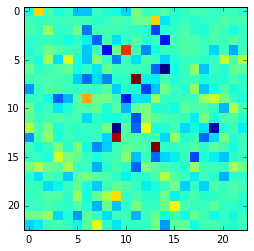

In [58]:
I = intensities.reshape(23,23,23)
imshow(I[0,:,:], interpolation='nearest')

In [61]:
# as an exercise, let's compute a continuous diffraction pattern
# like we would see on a detector at a beamline!

dtc = thor.Detector.generic(l=150)
print dtc.reciprocal # this is the same as "q_values" above

[[-2.45820464 -2.45820464 -1.38041173]
 [-2.46398002 -2.43934022 -1.37174866]
 [-2.46973764 -2.42034288 -1.36311223]
 ..., 
 [ 2.46973764  2.42034288 -1.36311223]
 [ 2.46398002  2.43934022 -1.37174866]
 [ 2.45820464  2.45820464 -1.38041173]]


CPU Thread 0 :: 1 shots
(40401,)


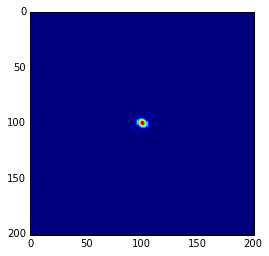

In [64]:
amplitudes = scatter.simulate_atomic(traj, num_molecules, dtc.reciprocal,
                                     finite_photon=False, ignore_hydrogens=True,
                                     dont_rotate=True)
I = np.abs(np.square(amplitudes))
print I.shape


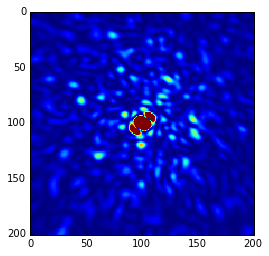

In [70]:
imshow(I.reshape(201,201), interpolation='nearest', vmax=500000)